In [1]:
import DecisionTreeRegressor as dtr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.5

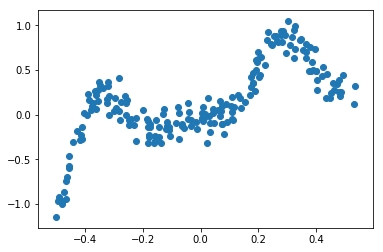

In [3]:
plt.scatter(x, y)

In [4]:
df = pd.DataFrame(data=x, columns=['x_data'])
df['output'] = pd.DataFrame(data=y)
df.head()

,x_data,output
0,-0.491727,-0.968202
1,-0.490010,-0.918615
2,-0.478171,-1.004074
3,-0.454480,-0.592458
4,-0.479334,-0.981809


In [5]:
def split_data(data, split_value):
    mask = data[:, 0]<= split_value
    data_below = data[mask]
    data_above = data[~mask]
    return data_below, data_above

In [6]:
## Linear Regression

def piecewise_regression(x, y, x0):
    x1 = x[x<=x0]
    x2 = x[x>x0]
    y1 = y[x<=x0]
    y2 = y[x>x0]
    
    n = len(x)
    X1 = np.maximum(0., x0-x1)
    X2 = np.maximum(0., x2-x0)
    
    sy = np.sum(y1)+np.sum(y2)
    sX12 = np.sum(X1**2)
    sX22 = np.sum(X2**2)
    
    sX1y1 = np.sum(X1*y1)
    sX1 = np.sum(X1)
    
    sX2y2 = np.sum(X2*y2)
    sX2 = np.sum(X2)
    
    b0 = (sy*sX12*sX22 - sX1y1*sX1*sX22 - sX2y2*sX2*sX12)/(n*sX12*sX22 - (sX1**2)*sX22 - (sX2**2)*sX12)
    
    m1 = (sX1y1 - b0*sX1)/sX12
    m2 = (sX2y2 - b0*sX2)/sX22
    
    return m1, m2, b0, x0
    ###########

def output(x, m1, m2, b0, x0, **kwargs):
    y = b0 + m1*np.maximum(0, x0-x) + m2*np.maximum(0, x-x0)
    return y

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

In [24]:
def get_potential_splits(col):
    potential_splits = {}
        
    col = np.unique(col)
#     mask = np.logical_or(col!=col.min() , col!=col.max())
#     unique_values = col[mask]
    unique_values = col[1:-1]
    return unique_values

pot_splits = get_potential_splits(x)
pot_splits[50]

-0.24792689342228336

Error  0.2664498738150058


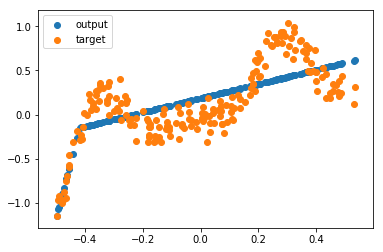

In [25]:
m1, m2, b0, x0 = piecewise_regression(x, y, pot_splits[14])
outputs = output(x, m1, m2, b0, x0)
targets = y
print('Error ',error(targets, outputs))

plt.scatter(x, outputs, label='output')
plt.scatter(x, targets, label='target')

plt.legend()

plt.show()

In [26]:
pot_splits = get_potential_splits(x)

In [27]:
# split_data(df.values, pot_splits[30])

In [28]:
def calculate_overall_error(x, y, x0):
    m1, m2, b0, x0 = piecewise_regression(x, y, x0)
    outputs = output(x, m1, m2, b0, x0)
    targets = y
    err = error(targets, outputs)

    return err,  {'m1':m1, 'm2': m2, 'b0':b0, 'x0':x0 } #, 'e1':err1, 'e2':err2}

In [29]:
def determine_best_split(data, potential_splits):
    
    overall_err = 99999999
    best_split_value = potential_splits[0]
    vals = {}
    for value in potential_splits[:-1]:
#         data_below, data_above = split_data(data, split_value=value)
        current_overall_error, val = calculate_overall_error(data[:, 0],data[:,1], value)
#         print(value, current_overall_error)

        if current_overall_error <= overall_err:
            overall_err = current_overall_error
            best_split_value = value
            vals = val
    vals['error'] = overall_err
    return vals

In [30]:
np.c_[x,y].shape, df.values.shape

((200, 2), (200, 2))

In [31]:
pot_splits = get_potential_splits(x)

In [32]:
vals = determine_best_split(df.values, pot_splits)
print(vals)

{'m1': -14.455690483267137, 'm2': 0.8113730812348092, 'b0': -0.16201716839430738, 'x0': -0.42676378176634644, 'error': 0.26643567927237993}


In [33]:
values = {}

def output_from_values():
    output_list = []
    for i, val in values.items():
        out = output(x, **val)
        output_list.append(out)
    outputs = np.array(output_list)
    outputs = outputs.sum(axis=0)
    return outputs

targets = y

{'m1': -14.455690483267137, 'm2': 0.8113730812348092, 'b0': -0.16201716839430738, 'x0': -0.42676378176634644, 'error': 0.26643567927237993}


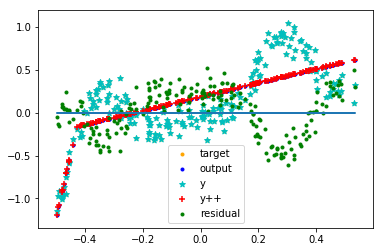

In [34]:
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[len(values)] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, targets, label='target', color='orange', marker='.')
plt.scatter(x, outputs, label='output', color='b', marker='.')

yall = output_from_values()
plt.scatter(x, y, label='y', color='c', marker='*')
plt.scatter(x, yall, label='y++', color='r', marker='+')

residual = outputs - targets
plt.scatter(x, residual, label='residual', color='g', marker='.')
plt.plot(x, np.zeros_like(x))

targets = -residual


plt.plot()
plt.legend()

{'m1': -0.031267640529009454, 'm2': -0.1919976936278381, 'b0': 0.01441430597929442, 'x0': 0.26591055075440584, 'error': 0.12221875751001775}
[-2.08166817e-16 -2.77555756e-16  1.80411242e-16 -1.04083409e-16
 -2.79290480e-16  2.61943245e-16  1.38777878e-16  4.16333634e-17
  9.88792381e-17 -3.98986399e-17 -1.66533454e-16 -1.66533454e-16
 -1.78676518e-16 -2.77555756e-17 -2.77555756e-17 -5.55111512e-17
  5.55111512e-17  4.85722573e-17  0.00000000e+00  0.00000000e+00
  2.08166817e-17  2.77555756e-17 -6.93889390e-17  4.16333634e-17
  0.00000000e+00 -4.85722573e-17  2.77555756e-17  1.38777878e-17
  4.85722573e-17  0.00000000e+00  0.00000000e+00 -6.93889390e-18
 -6.93889390e-18  0.00000000e+00  0.00000000e+00 -5.55111512e-17
 -5.55111512e-17 -2.77555756e-17  8.32667268e-17  2.77555756e-17
 -6.93889390e-18 -6.07153217e-17  1.11022302e-16 -6.93889390e-18
  1.38777878e-17 -4.16333634e-17  0.00000000e+00 -3.46944695e-17
 -5.55111512e-17  0.00000000e+00  0.00000000e+00  8.32667268e-17
  2.77555756e-

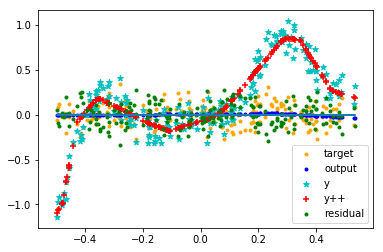

In [59]:
vals = determine_best_split(np.c_[x, targets], pot_splits)
values[len(values)] = vals
print(vals)
outputs = output(x, **vals)

plt.scatter(x, targets, label='target', color='orange', marker='.')
plt.scatter(x, outputs, label='output', color='b', marker='.')

yall = output_from_values()
plt.scatter(x, y, label='y', color='c', marker='*')
plt.scatter(x, yall, label='y++', color='r', marker='+')
residual_all = yall - y


residual = outputs - targets
plt.scatter(x, residual, label='residual', color='g', marker='.')
plt.plot(x, np.zeros_like(x))

targets = -residual


plt.plot()
plt.legend()
print(residual_all - residual)